#Categorical Data and the Dirichlet Discrete Distribution

---

Let's consider some examples of data with categorical variables

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('talk')
sns.set_style('darkgrid')

First, the passenger list of the Titanic

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head(n=10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


One of the categorical variables in this dataset is `embark_town`

Let's plot the number of passengers departing from each town

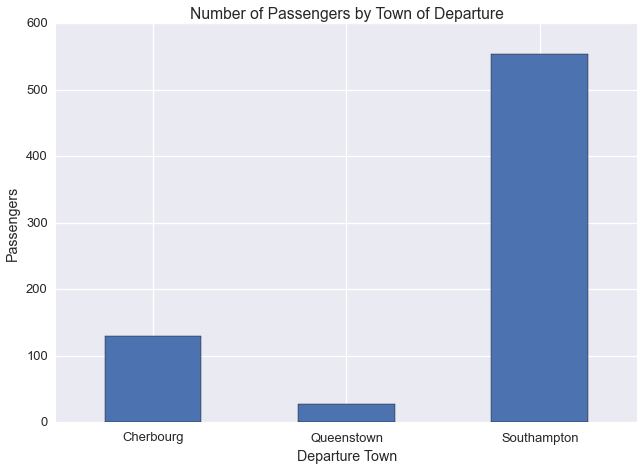

In [4]:
ax = titanic.groupby(['embark_town'])['age'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Departure Town')
plt.ylabel('Passengers')
plt.title('Number of Passengers by Town of Departure')

Let's look at another example: the [cars93 dataset](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Cars93.html)

In [5]:
cars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv', index_col=0)

In [6]:
cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [7]:
cars.ix[1]

Manufacturer                  Acura
Model                       Integra
Type                          Small
Min.Price                      12.9
Price                          15.9
Max.Price                      18.8
MPG.city                         25
MPG.highway                      31
AirBags                        None
DriveTrain                    Front
Cylinders                         4
EngineSize                      1.8
Horsepower                      140
RPM                            6300
Rev.per.mile                   2890
Man.trans.avail                 Yes
Fuel.tank.capacity             13.2
Passengers                        5
Length                          177
Wheelbase                       102
Width                            68
Turn.circle                      37
Rear.seat.room                 26.5
Luggage.room                     11
Weight                         2705
Origin                      non-USA
Make                  Acura Integra
Name: 1, dtype: object

This dataset has multiple categorical variables

Based on the description of the cars93 datatset, we'll consider `Manufacturer`, and `DriveTrain` to be categorical variables

Let's plot `Manufacturer` and `DriveTrain`

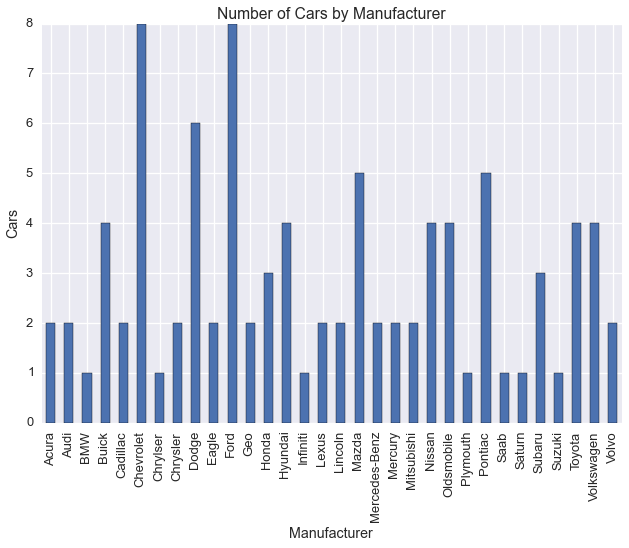

In [8]:
cars.groupby('Manufacturer')['Model'].count().plot(kind='bar')
plt.ylabel('Cars')
plt.title('Number of Cars by Manufacturer')

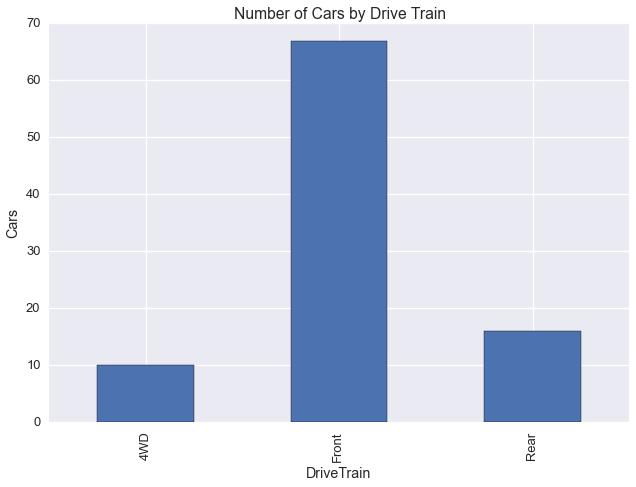

In [9]:
cars.groupby('DriveTrain')['Model'].count().plot(kind='bar')
plt.ylabel('Cars')
plt.title('Number of Cars by Drive Train')

If our categorical data has labels, we need to convert them to integer id's

In [10]:
def col_2_ids(df, col):
    ids = df[col].drop_duplicates().sort(inplace=False).reset_index(drop=True)
    ids.index.name = '%s_ids' % col
    ids = ids.reset_index()
    df = pd.merge(df, ids, how='left')
    del df[col]
    return df

In [11]:
cat_columns = ['Manufacturer', 'DriveTrain']

for c in cat_columns:
    print c
    cars = col_2_ids(cars, c)

Manufacturer
DriveTrain


In [12]:
cars[['%s_ids' % c for c in cat_columns]].head()

,Manufacturer_ids,DriveTrain_ids
0,0,1
1,0,1
2,1,1
3,1,1
4,2,2


Just as we model binary data with the beta Bernoulli distribution, we can model categorical data with the Dirichlet discrete distribution

The beta Bernoulli distribution allows us to learn the underlying probability, $\theta$, of the binary random variable, $x$

$$P(x=1) =\theta$$
$$P(x=0) = 1-\theta$$

The Dirichlet discrete distribution extends the beta Bernoulli distribution to the case in which $x$ can assume more than two states

$$\forall i \in [0,1,...n] \hspace{2mm} P(x = i) = \theta_i$$
$$\sum_{i=0}^n \theta_i = 1$$

Again, the Dirichlet distribution takes advantage of the fact that the Dirichlet distribution and the discrete distribution are conjugate. Note that the discrete distriution is sometimes called the categorical distribution or the multinomial distribution.

To import the Dirichlet discrete distribution call

In [13]:
from microscopes.models import dd as dirichlet_discrete

Then given the specific model we'd want we'd import

`from microscopes.model_name.definition import model_definition`

**NOTE: You must specify the number of categories in your Dirichlet Discrete distribution**

For `5` categories, for examples you must specify the likelihood as:

In [14]:
dd5 = dirichlet_discrete(5)

You can then use the model definition as appropriate for your desired model:

In [15]:
from microscopes.irm.definition import model_definition as irm_definition
from microscopes.mixture.definition import model_definition as mm_definition
from microscopes.lda.definition import model_definition as hdp_definition